# PW 8 : Regularization


## Importing libraries and dataset :

Importing libraries :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing dataset :

In [ ]:
dataset = pd.read_csv("mouse_viral_study.csv")

dataset.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


## Discovering dataset :

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


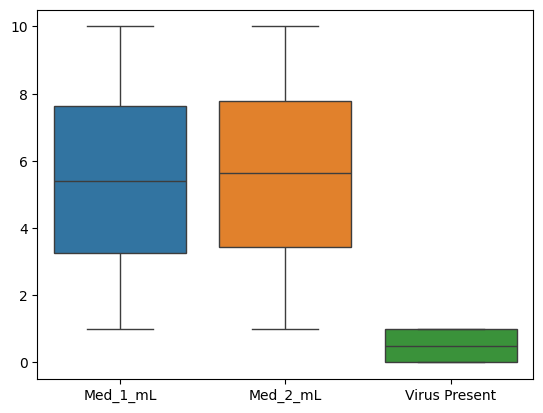

In [ ]:
sns.boxplot(data=dataset)
plt.show()

## Analyzing :

Select our feature and also our target :

In [ ]:
X = dataset["Med_1_mL"]
y = dataset["Med_2_mL"]

Visualize the distribution :

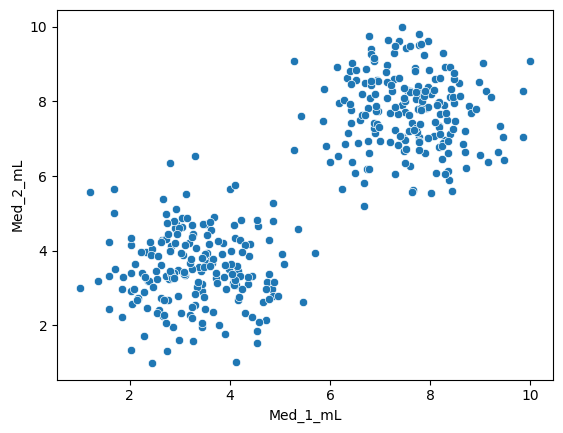

In [ ]:
sns.scatterplot(x=X, y=y)
plt.show()

Prepare our dataset to train our model :

In [ ]:
X = X.values.reshape(-1, 1)
y = y.values

Splitting the dataset :

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## The model :

For this dataset, we are using a polynomial model.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

## Selecting the best degree using the BIC method :

Implementing the BIC formula :

In [ ]:
from sklearn.metrics import mean_squared_error

def BIC(max_degree, training_data):
  bic_values = []
  models = []

  for degree in range(1, max_degree+1):
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    num_params = X_train_poly.shape[1]

    y_train_pred = model.predict(X_train_poly)
    log_likelihood = -0.5 * len(X_train) * np.log(mean_squared_error(y_train, y_train_pred))

    bic = -2 * log_likelihood + num_params * np.log(len(X_train))

    bic_values.append(bic)
    models.append(model)

  return models, bic_values

Running the function :

In [ ]:
models, bic_values = BIC(17, X_train)

Visualizing the BIC values :

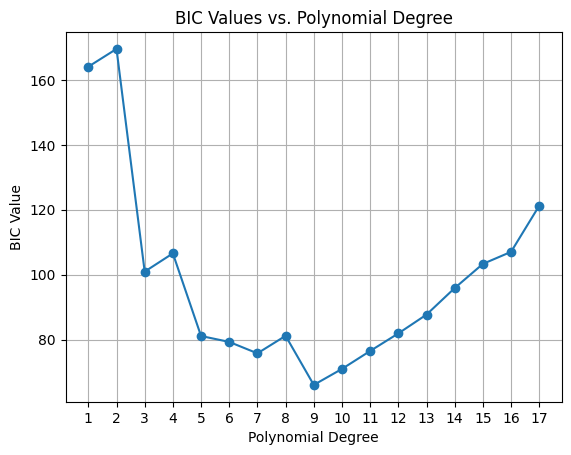

In [ ]:
plt.plot(range(1, 18), bic_values, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('BIC Value')
plt.title('BIC Values vs. Polynomial Degree')
plt.xticks(range(1, 18))
plt.grid(True)
plt.show()

As we see here, the BIC method give us an insight about the the best degree to run our polymonial model is 9th degree.

## Creating from scratch a polymonial model for the 17th degree :

### Preparing the training dataset:

Grapping our feature and our target :

In [ ]:
print(X.shape)
print(y.shape)

(400, 1)
(400,)


Preparing our dataset for the 17th degree

In [ ]:
X_powers = np.empty((X.shape[0], 0))

for i in range(1, 18):
  X_power = X ** i
  X_powers = np.hstack((X_powers, X_power))

print(f"The shape : {X_powers.shape}")
print(X_powers[:2])

The shape : (400, 17)
[[6.50823109e+00 4.23570720e+01 2.75669613e+02 1.79412154e+03
  1.16765576e+04 7.59937354e+04 4.94584791e+05 3.21887212e+06
  2.09491636e+07 1.36341998e+08 8.87345230e+08 5.77504782e+09
  3.75853458e+10 2.44614116e+11 1.59200519e+12 1.03611377e+13
  6.74326786e+13]
 [4.12611616e+00 1.70248346e+01 7.02464450e+01 2.89844992e+02
  1.19593410e+03 4.93456303e+03 2.03605803e+04 8.40101193e+04
  3.46635511e+05 1.43025838e+06 5.90141222e+06 2.43499123e+07
  1.00470567e+08 4.14553229e+08 1.71049478e+09 7.05770014e+09
  2.91208906e+10]]


For avoiding the overflow error, I normalize the dataset using zscore

In [ ]:
def normalize_zscore(data):
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)
    normalized_data = (data - mean) / std_dev
    return normalized_data

X_powers = normalize_zscore(X_powers)

print(X_powers[:2])

[[ 0.4577611   0.2869266   0.11304565 -0.04037883 -0.16249441 -0.25111627
  -0.30921129 -0.34216029 -0.35592861 -0.35602809 -0.34704813 -0.33254184
  -0.31510387 -0.29653133 -0.27800278 -0.2602421  -0.24365363]
 [-0.57071546 -0.70712952 -0.76547292 -0.76817943 -0.73708539 -0.68846126
  -0.63284447 -0.57643843 -0.52260422 -0.47297923 -0.42820225 -0.38835198
  -0.35320505 -0.32238732 -0.29546252 -0.27198383 -0.25152292]]


Splitting the dataset :

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_powers, y,
                                                        test_size=0.2,
                                                        random_state=101)

print(X_train.shape)
print(y_train.shape)

(320, 17)
(320,)


In [ ]:
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))

print(X_train.shape)
print(y_train.shape)

(320, 18)
(320,)


### The model :

In [ ]:
def model(X, theta):
    return X.dot(theta)

def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)

    return theta[:, 0].reshape(-1, 1), cost_history

### Training the model :

Initializing our paramaters :

In [ ]:
theta = np.random.randn(X_train.shape[1], 1)

n_iterations = 1000
learning_rate = 1e-2

theta.shape

(18, 1)

In [ ]:
theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)

print(theta_final.shape)

(18, 1)


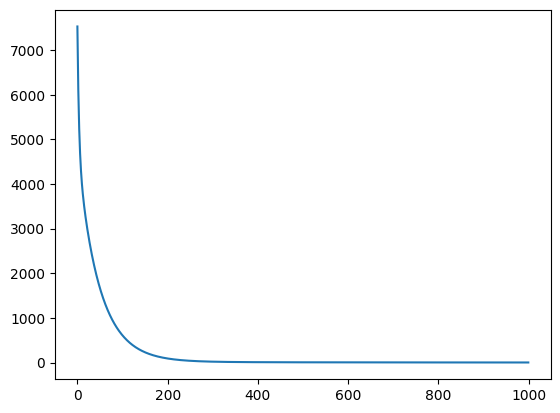

In [ ]:
plt.plot(range(n_iterations), cost_history)
plt.show()

### Evaluating :

In [ ]:
pred_train = model(X_train, theta)
pred_test = model(X_test, theta)

pred_train.shape

(320, 1)

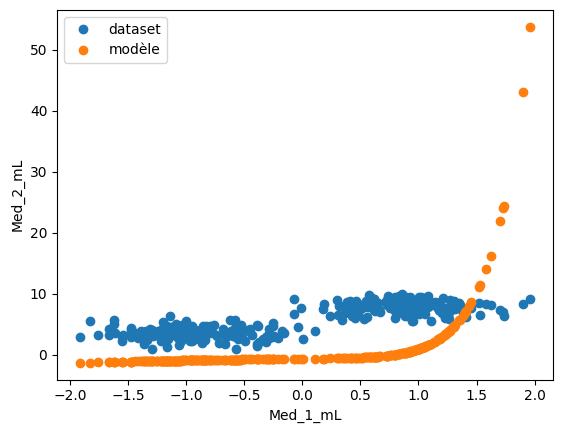

In [ ]:
plt.plot(X_train[:, 0], y_train, 'o', label="dataset")
plt.plot(X_train[:, 0], pred_train[:, 0],'o', label='modèle')
plt.xlabel('Med_1_mL')
plt.ylabel('Med_2_mL')
plt.legend()
plt.show()

## Correcting the overffiting using L1 :

Implementing the L1 formula :

In [ ]:
def model(X, theta):
    return X.dot(theta)

def cost_function(X, y, theta, a):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2) + a/m * np.linalg.norm(theta, ord=1)

def grad(X, y, theta, a):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y) + a/m * theta *np.sign(theta)

def gradient_descent(X, y, theta, learning_rate, n_iterations, a):
    cost_history = np.zeros(n_iterations)

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta, a)
        cost_history[i] = cost_function(X, y, theta, a)

    return theta[:, 0].reshape(-1, 1), cost_history

In [ ]:
theta = np.random.randn(X_train.shape[1], 1)

n_iterations = 1000
learning_rate = 1e-2

theta.shape

(18, 1)

In [ ]:
theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations, 1)

print(theta_final.shape)

(18, 1)


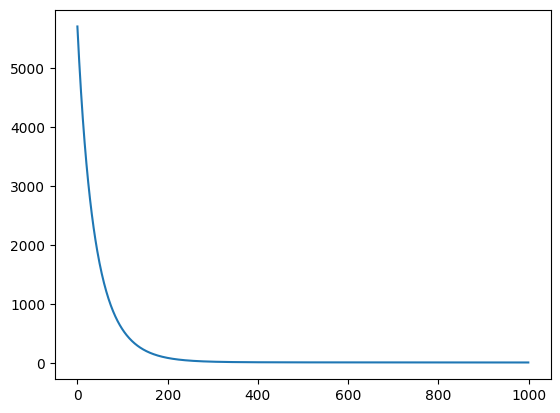

In [ ]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [ ]:
pred_train = model(X_train, theta)
pred_test = model(X_test, theta)

pred_train.shape

(320, 1)

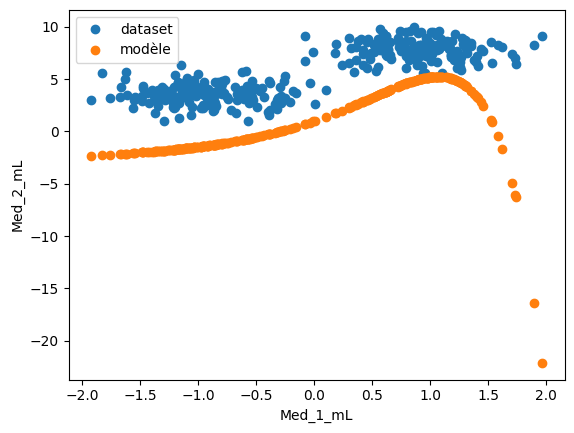

In [ ]:
plt.plot(X_train[:, 0], y_train, 'o', label="dataset")
plt.plot(X_train[:, 0], pred_train[:, 0],'o', label='modèle')
plt.xlabel('Med_1_mL')
plt.ylabel('Med_2_mL')
plt.legend()
plt.show()

## Correcting the overffiting using L2 :

Implementing the L2 formula :

In [ ]:
def model(X, theta):
    return X.dot(theta)

def cost_function(X, y, theta, a):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2) + a/(2*m) * np.sum(theta[0:len(theta)-1]**2)

def grad(X, y, theta, a):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y) + a/m * theta

def gradient_descent(X, y, theta, learning_rate, n_iterations, a):
    cost_history = np.zeros(n_iterations)

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta, a)
        cost_history[i] = cost_function(X, y, theta, a)

    return theta[:, 0].reshape(-1, 1), cost_history

In [ ]:
theta = np.random.randn(X_train.shape[1], 1)

n_iterations = 1000
learning_rate = 1e-2

theta.shape

(18, 1)

In [ ]:
theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations, 1)

print(theta_final.shape)

(18, 1)


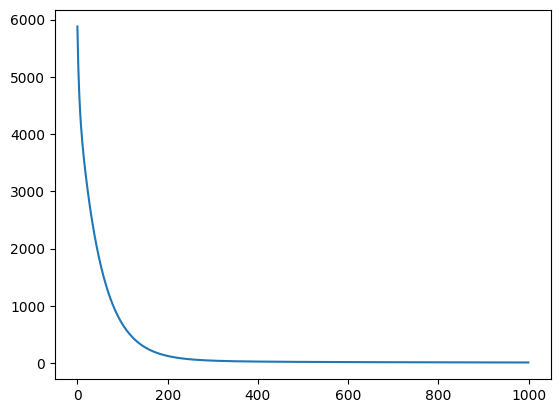

In [ ]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [ ]:
pred_train = model(X_train, theta)
pred_test = model(X_test, theta)

pred_train.shape

(320, 1)

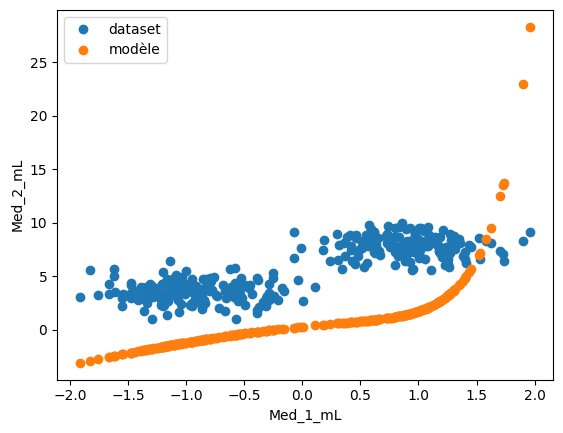

In [ ]:
plt.plot(X_train[:, 0], y_train, 'o', label="dataset")
plt.plot(X_train[:, 0], pred_train[:, 0],'o', label='modèle')
plt.xlabel('Med_1_mL')
plt.ylabel('Med_2_mL')
plt.legend()
plt.show()

## Comparing the results :

Without regularization, the model tends to overfit the training data, resulting in high variance and poor generalization to unseen data. With regularization, the model's complexity is controlled, leading to improved generalization performance and reduced risk of overfitting.